<a href="https://colab.research.google.com/github/HugoRDS7/DS_IFT6758/blob/main/Mila_Git_Tutorial_ift6758.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this tutorial, we will learn about the basics of Git. 

# Setting up a Repository on GitHub

In this section, we will discuss how to set up a simple GitHub repository. First, [create a free GitHub account](https://github.com/signup?ref_cta=Sign+up&ref_loc=header+logged+out&ref_page=%2F&source=header-home) if you do not have one yet. After that, you are required to click on the repositories tab in the GitHub console. 

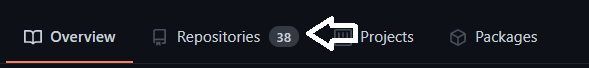

Select the options "New". This will allow you to create a new repository.
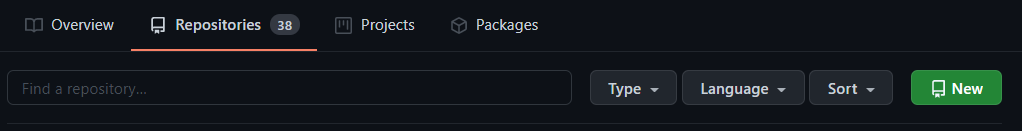

Enter a repository name. This is a name local to your GitHub account. For example, if you name a repo **abcd**, and there already exists a repo called **abcd** in another account, you could still maintain that name. 

You could make your repository either public or private. A public repository is visible by anyone having the URL or the repository and is automatically indexed by search engines, while private repositories cannot be accessed without secure credetials/OAuth handshakes. 
You could add a `README.md` file, which tells others about what your software does. You could add a .gitignore file (We will come to it later), or choose a license (A license specifies if someone can re-use your software, or if they can sell copies of your software. You can use a pre-defined license, or create your own T&C, keep in mind that licenses are a grey zone in software engineering, and often, a lawyer might need to get involved to avert IP related issues). 

After you have created a repository, you are good to use the repository for this tutorial. 

For the purpose of this tutorial and for security reasons, we've used the OAuth mechanism for authentication, however, for regular development on your local machine, we would recommend a standard SSH authentication flow, and you can learn about it more [here](https://docs.github.com/en/github/authenticating-to-github/connecting-to-github-with-ssh). 

To clone the repo properly, first, you need to create an OAuth developer access token. You will be able to create it if you go to `account settings`, and then `personal access token`, and then `generate new token`. A screenshot indicating how the token should look like after you've created it is given as follows: 

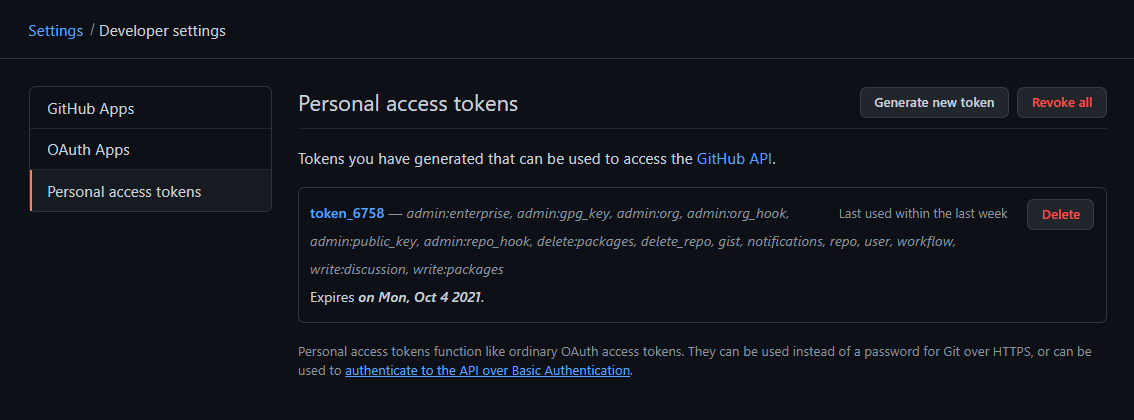

For brevity/simplicity, I've created a master/777 token, though if you're going by OAuth fundamentals, you're encouraged to be more specific with the roles you choose. 

For the sake of security, I'm using placeholders in the command that I need to run to close the repo. Of course, you would need to replace the place-holders with the original token to run your command. 

To clone a repo securely (without your plain text being visible in your notebook), do the following steps: 



1.   Run `!bash`, this displays a temporary bash window in your Colab cell. 
2.   Clone by pasting this query/command: `git clone https://<GitubUserName>:<GithubToken>@github.com/<GithubUserName>/<RepoName>`

You might be wondering why we're doing this step - we're doing so to avoid tokens in plaintext in the Colab Notebook. After this executes, please stop the `bash!` cell. 



In [ ]:
!bash

bash: cannot set terminal process group (59): Inappropriate ioctl for device
bash: no job control in this shell
/content# 

After this step, you should be able to see the test repo at the side panel of the Colab notebook. Now, you have to go inside the notebook to start running git commands. To go into the folder, we change the directory using the `$ cd` command. 

In [ ]:
# In my case, the name of the folder/repo is 6758-test
% cd 6758-test

/content/6758-test


In [ ]:
# Verify the directy
% ls

LICENSE


I just have the LICENSE file in the repository, so it means I am in the correct directory! If you did not have a license or chose a different version of license, you would see different content. 

Okay, now that the boring setup part is done, let's explore some Git commands. First, let's check the status of the Git repository. We can do this by using the `$ git status` command. It's a shell command and not a Python/iPython command, so we create a temporary bash session using the `!` operator.

# Briefly analyzing git status, git add, git commit, and configuring user credentials

Git is a version control system (VCS), and it is a graph-like data structure that essentially updates copies of local and remote repositories, so that a software project is in sync, and so that multiple developers can work on the same piece of code. 
We will look at some commands that git uses to do so in this tutorial. 

When we start a new project, we often add new files to the repository. During development, we would like those files to be present on the remote instance of the repository. This is where git comes in - we can use git commands to update the remote version with local content (and vice-versa), and more importantly track changes during development. This allows multiple users to work on the same repository at once (in theory!).

Here is a high-level overview of Git workflows:

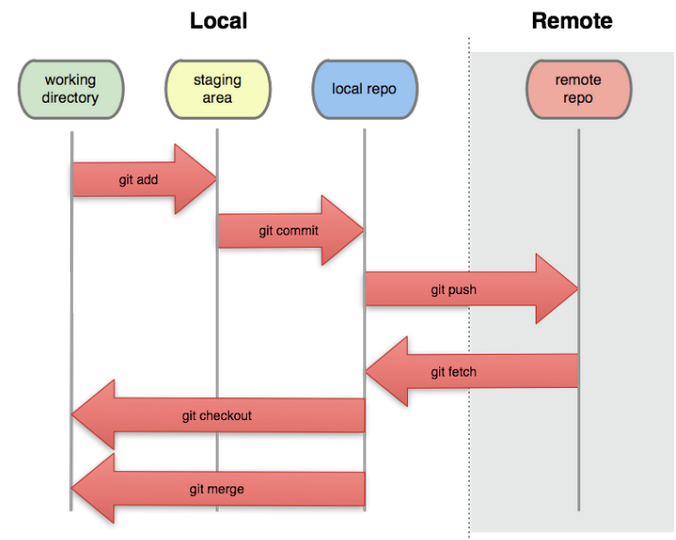

Lets begin by getting the status of our repository.

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


The message above says we are in the `main` branch. What does this mean? This means that we're operating a branch of code that is called main, and we have no changes to commit/push, which is denoted by the text `nothing to commit, working tree clean`. Let's understand this a little better by making a change to this branch. 

In [ ]:
%%writefile abc.txt
Hello world

Writing abc.txt


We have created a dummy file called `abc.txt`. Now, let's see what our `$ git status` says!

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	abc.txt

nothing added to commit but untracked files present (use "git add" to track)


Now, you see that the message states that there's a file called `abc.txt` that is untracked. 

You might be wondering what does it mean by `untracked`. It means that we will be unable to commit it till we add the file, as the message states. So, let's go ahead and add the file, and then see what the message states. 

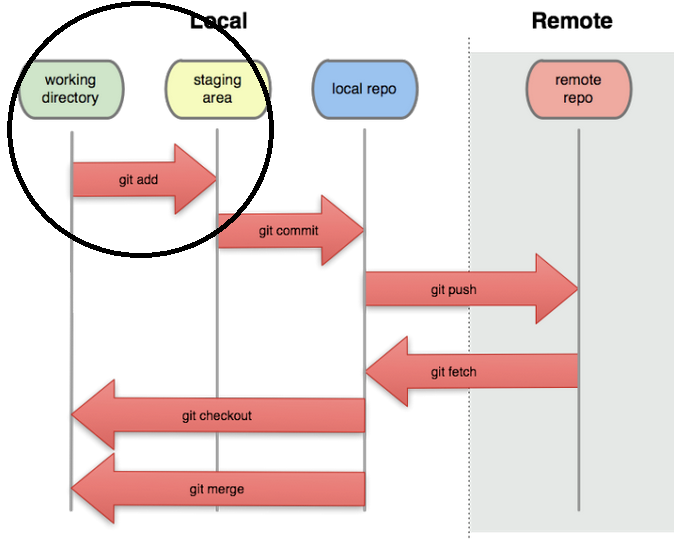

We will try to add a file to our staging area below. 

In [ ]:
!git add abc.txt

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   abc.txt



Voila! Now that your file is ready to be committed, we can now work on committing it. To commit it, we use the following command. 

In [ ]:
!git commit -m "Adding a file called abc.txt" 


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ce8973234a68.(none)')


So, as you see we are unable to commit as we've not mentioned our email ID and our name. In this stage, run the commands, and make sure that the details match with your GitHub e-mail and name. 

In [ ]:
!git config --global user.email "alice@bob.ca"
!git config --global user.name "bob"

In [ ]:
# Now, let's try committing again. 
!git commit -m "Adding a file called abc.txt" 

[main 57002fc] Adding a file called abc.txt
 1 file changed, 1 insertion(+)
 create mode 100644 abc.txt


Bam! Now your file has been committed. 

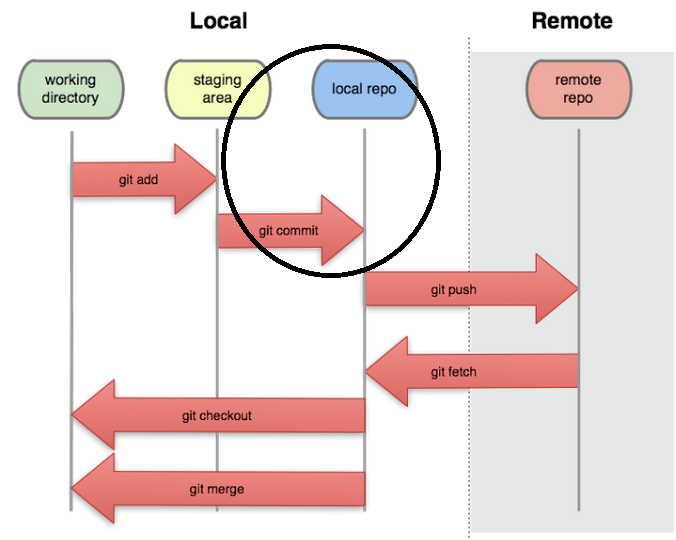

But does that mean you can see the changes if you go to GitHub? Nope. The commit is only local. This means that the commit has been done on the copy of the git repository of your local machine, and the remote version of the repository (on Github.com) has not synced with your local changes. 

Now how do you make them both sync? We push our changes. 

In [ ]:
# Attempt to push
!git push -u origin

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 306 bytes | 306.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://github.com/Arka161/6758-test
   ee8b2c5..57002fc  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


Now, you should be able to see your new file on your GitHub repo. 

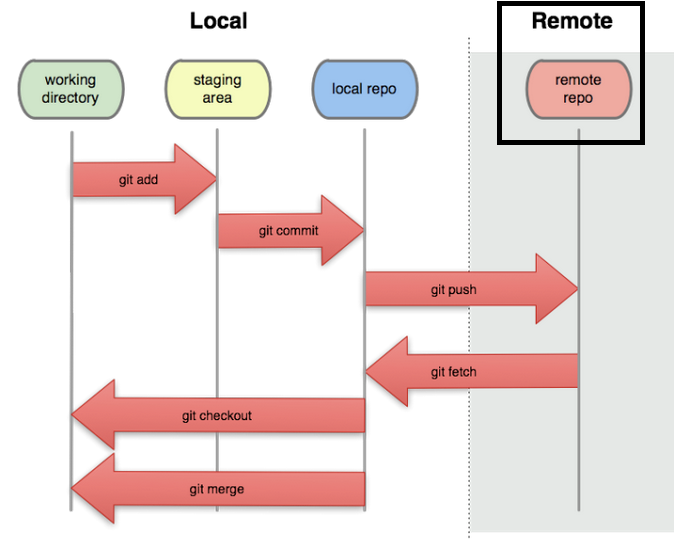

# Branches in Git

Let's say you're a Dev and you are working on a feature which is supposed to go into stable branch (eg: Main/Master), but has a very high chance of making the whole piece of software unstable while you're developing it. These kind of scenarios should be discretely handled using **branches**. A branch keeps your code separate from the code used in BETA/Production, hence asserting an efficient software development pipeline. 

In [ ]:
# check my current branch 
!git branch

* main


The `$ git branch` command tells me which branch I'm in, and as we can see, we're in main. Let's create a new branch, called `advanced_feature`. 

In [ ]:
# create a new branch using the following command
!git checkout -b advanced_feature

Switched to a new branch 'advanced_feature'


The `$ git checkout` command is basically used to enter a branch, and the `-b` flag enables us to create a new branch.

In [ ]:
# Check branch again
!git branch

* advanced_feature
  main


As you can see, we're in `advanced_feature` now. Let's develop an advanced feature (jk)! 

In [ ]:
# Creating an advanced feature
%%writefile adv.txt
Advanced Feature developed

Writing adv.txt


In [ ]:
# See if file exists
!ls

abc.txt  adv.txt  bcd.txt  LICENSE


In [ ]:
# Check git status
!git status

On branch advanced_feature
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	adv.txt

nothing added to commit but untracked files present (use "git add" to track)


You see that `$ git status` not only tells you which branch you're in, but it also tells you which files are not tracked.

In [ ]:
# Let's add and commit the new file 
!git add adv.txt
!git commit -m "committing advanced feature"

[advanced_feature 74e383d] committing advanced feature
 1 file changed, 1 insertion(+)
 create mode 100644 adv.txt


In [ ]:
# Check the Git log for this branch 
!git log

commit 74e383d6a65ebb1e0ebc2b60569cfb3997439a5e (HEAD -> advanced_feature)
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 04:02:40 2021 +0000

    committing advanced feature

commit a50208bc7811ed94c1258fee766337677605068b (origin/main, origin/HEAD, main)
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 03:54:37 2021 +0000

    adding bcd.txt

commit 57002fc5183fdd1d1698fc6a14d662000840e929
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 03:49:36 2021 +0000

    Adding a file called abc.txt

commit ee8b2c5ad0ab1a456755c137081e67e7571746d9
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Fri Sep 3 19:48:21 2021 -0400

    Initial commit


Since the branch was created FROM the `main` branch, we have the commit history of the main branch also visible. 

Let's now push the branch into remote. Please note that the branch may not exist in remote, so you might have to sync your local repository with the upstream, and then push it to the remote. 

In [ ]:
# Push the feature
!git push --set-upstream origin advanced_feature

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 349 bytes | 349.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'advanced_feature' on GitHub by visiting:
remote:      https://github.com/Arka161/6758-test/pull/new/advanced_feature
remote: 
To https://github.com/Arka161/6758-test
 * [new branch]      advanced_feature -> advanced_feature
Branch 'advanced_feature' set up to track remote branch 'advanced_feature' from 'origin'.


Your remote should have the new branch + the contents! 

Now, let's merge the advanced feature into the `main` branch. 

In [ ]:
# First checkout to main
!git checkout main

Switched to branch 'main'
Your branch is up to date with 'origin/main'.


In [ ]:
# Merge advanced_feature into main
!git merge advanced_feature

Updating a50208b..74e383d
Fast-forward
 adv.txt | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 adv.txt


In [ ]:
# check log after merge
!git log

commit 74e383d6a65ebb1e0ebc2b60569cfb3997439a5e (HEAD -> main, origin/advanced_feature, advanced_feature)
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 04:02:40 2021 +0000

    committing advanced feature

commit a50208bc7811ed94c1258fee766337677605068b (origin/main, origin/HEAD)
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 03:54:37 2021 +0000

    adding bcd.txt

commit 57002fc5183fdd1d1698fc6a14d662000840e929
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Sun Sep 5 03:49:36 2021 +0000

    Adding a file called abc.txt

commit ee8b2c5ad0ab1a456755c137081e67e7571746d9
Author: Arka Mukherjee <arka_mukherjee@srmuniv.edu.in>
Date:   Fri Sep 3 19:48:21 2021 -0400

    Initial commit


As you can see, the feature was merged into `main` successfully. 

Alternate way to export new features to main - `$ git rebase`. The main difference between the outcome of two is the commit history. Basically, `$ git merge` can make it more difficult for some to analyze the commit history, though it is a matter of personal preference. We will look at a quick demo using `$ git rebase` below.

In [ ]:
!git checkout -b cool_feature

Switched to a new branch 'cool_feature'


In [ ]:
%%writefile cool.txt
cool feature

Writing cool.txt


In [ ]:
!git add cool.txt

In [ ]:
!git commit -m "committing cool feature"

[cool_feature c146147] committing cool feature
 1 file changed, 1 insertion(+)
 create mode 100644 cool.txt


In [ ]:
# Push the feature
!git push --set-upstream origin cool_feature

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 293 bytes | 293.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: 
remote: Create a pull request for 'cool_feature' on GitHub by visiting:
remote:      https://github.com/Arka161/6758-test/pull/new/cool_feature
remote: 
To https://github.com/Arka161/6758-test
 * [new branch]      cool_feature -> cool_feature
Branch 'cool_feature' set up to track remote branch 'cool_feature' from 'origin'.


In [ ]:
!git checkout main

Already on 'main'
Your branch is ahead of 'origin/main' by 3 commits.
  (use "git push" to publish your local commits)


In [ ]:
# Now, rebase it with master/main. Let your cool_feature be the new `base` for your development pipeline
!git rebase cool_feature

First, rewinding head to replay your work on top of it...
Fast-forwarded main to cool_feature.


In [ ]:
% ls

abc.txt  adv2.txt  adv3.txt  adv.txt  bcd.txt  cool.txt  LICENSE


In [ ]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 4 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


Thus, we can see the changes in the main branch, after we set the `cool_feature` as the new base for the development pipeline. 

Lastly, we will briefly discuss the concept of `$ git fetch`. Let's say we have a scenario where a developer updates the `main` branch of the remote repository with some new content. However, your local `main` branch might just be updated to the last time your `git` employed a `fetch` or a `pull` operation (`pull` is essentially `fetch`+`merge`). In that scenario, if you would like your local `main` branch to be updated with the remote `main` repository, you would have to run a `$ git fetch` command. 

Lastly, a `.gitignore` file can help you choose to not commit files in your local directory, and it is particularly useful in keeping secure content on the local machine (eg: Passwords, SSH Keys, etc).

#CHEATSHEETS

https://education.github.com/git-cheat-sheet-education.pdf

https://training.github.com/downloads/github-git-cheat-sheet.pdf

https://www.atlassian.com/git/tutorials/atlassian-git-cheatsheet

https://www.freecodecamp.org/news/git-cheat-sheet/



# OTHER REFERENCES

**Tutorial**

https://learngitbranching.js.org/


<br/>

**Slides** - Mila Git Tutorial

https://docs.google.com/presentation/d/1uaJw2f_JuoX87WmUxmPS2JULL592-zvC/edit?usp=sharing&ouid=115554499648322681142&rtpof=true&sd=true


<br/>


**Additional Git references**

https://rogerdudler.github.io/git-guide

https://missing.csail.mit.edu/2020/version-control

<br/>

**Linux shell references**

https://missing.csail.mit.edu/2020/race-shell

https://missing.csail.mit.edu/2020/shell-tools/
